## Libraries

In [83]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
import numpy
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

## Read Data

In [84]:
t = pandas.read_csv("hausbeispiele.csv")

In [85]:
t

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [86]:
t.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [87]:
t["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [88]:
t["SalePrice"].max()

755000

In [89]:
t["SalePrice"].min()

34900

In [90]:
t.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [91]:
print(len(t.columns))

81


## Plot Data

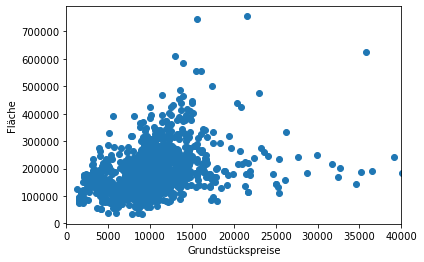

In [92]:
plt.scatter( t["LotArea"], t["SalePrice"] )
plt.xlabel("Grundstückspreise")
plt.ylabel("Fläche")
plt.xlim(0,40000)
plt.show()

In [93]:
# input x
x = t[ ["LotArea", "YearBuilt"] ]

In [94]:
x

,LotArea,YearBuilt
0,8450,2003
1,9600,1976
2,11250,2001
3,9550,1915
4,14260,2000
...,...,...
1455,7917,1999
1456,13175,1978
1457,9042,1941
1458,9717,1950


In [95]:
y = t["SalePrice"]

In [96]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

## Train/Test Split

In [97]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [98]:
x_test.shape
x_test

,LotArea,YearBuilt
529,32668,1957
491,9490,1941
459,7015,1950
279,10005,1977
655,1680,1971
...,...,...
326,10846,1993
440,15431,2008
1387,8520,1916
1323,5330,1940


## Machine Learning Modell erstellen/trainieren

In [99]:
model = tree.DecisionTreeRegressor()
model = model.fit(x_train, y_train)

## Modell testen

In [100]:
preds = model.predict(x_test)
preds[:10]

array([145000., 105000., 140000., 148750.,  94600., 133900., 214000.,
        76000., 231500., 207500.])

In [101]:
import sklearn
sklearn.__version__

'1.0.2'

In [102]:
y_test[0:10]

529     200624
491     133000
459     110000
279     192000
655      88000
1013     85000
1403    282922
601     141000
1182    745000
687     148800
Name: SalePrice, dtype: int64

In [103]:
#MAE
numpy.mean( abs(preds - y_test.values) )

49943.50114155251

## Alles in einer Zelle

In [117]:
# 1. Daten einlesen
import pandas
t = pandas.read_csv("hausbeispiele.csv")

# 2. Datenbereinigung / Datenvorbereitung

# verwerfe alle unvollständigen Spalten
t.dropna(axis="columns", inplace=True)

# Codiere alle kategorialen Spalten numerisch
t = pandas.get_dummies(t)

# 3. Input-Output-Split
x = t[ ["LotArea", "YearBuilt", "OverallQual"] ]
x = t.drop(columns="SalePrice")
y = t["SalePrice"]

# 4. Train-Test-Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=0)

# 5. Modell erstellen und trainieren
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
model = tree.DecisionTreeRegressor(random_state=0)
model = RandomForestRegressor()
model = GaussianProcessRegressor()
model = model.fit(x_train, y_train)

# Liste der Modelle:
modelle = [tree.DecisionTreeRegressor(random_state=0), RandomForestRegressor(), KNeighborsRegressor(), SVR()]

# Iteration durch Modelle: 
for model in modelle:
    model = model.fit(x_train, y_train)

# 6. Modellgüte bestimmen
    preds = model.predict(x_test)
    import numpy
    MAE = numpy.mean(abs(preds - y_test.values))
    print( f"{model}: {MAE:.2f}")

# Modelle speichern:
    import pickle
    datei = open(f"{model}.pkl", "wb") # w wie write, b wie binary
    pickle.dump(model, datei)
    datei.close()
    datei


DecisionTreeRegressor(random_state=0): 24059.54
RandomForestRegressor(): 17295.40
KNeighborsRegressor(): 30990.24
SVR(): 55543.09


### Speichern einer Python Liste in "PICKLE":

In [71]:
daten = ["X", 300, 235, "Y"]
import pickle
file = open("daten.pkl", "wb") # wb für "write binary"
pickle.dump(daten, file)
file.close()

### Lesen der Daten in Pickle

In [72]:
import pickle
file = open("daten.pkl", "rb") # r wie read b wie binary
d = pickle.load(file)
d

['X', 300, 235, 'Y']

### Modell wiederherstellen

In [118]:
# Modell wiederherstellen

import pickle
import sklearn
datei = open("RandomForestRegressor().pkl", "rb") # r wie read, b wie binary
model = pickle.load(datei)
datei.close()

In [119]:
import numpy

"""
0 :  Id
1 :  MSSubClass
2 :  LotArea
3 :  OverallQual
4 :  OverallCond
5 :  YearBuilt
6 :  YearRemodAdd
7 :  BsmtFinSF1
8 :  BsmtFinSF2
9 :  BsmtUnfSF
10 :  TotalBsmtSF
11 :  1stFlrSF
12 :  2ndFlrSF
13 :  LowQualFinSF
14 :  GrLivArea
15 :  BsmtFullBath
16 :  BsmtHalfBath
17 :  FullBath
18 :  HalfBath
19 :  BedroomAbvGr
20 :  KitchenAbvGr
21 :  TotRmsAbvGrd
22 :  Fireplaces
23 :  GarageCars
24 :  GarageArea
25 :  WoodDeckSF
26 :  OpenPorchSF
27 :  EnclosedPorch
28 :  3SsnPorch
29 :  ScreenPorch
30 :  PoolArea
31 :  MiscVal
32 :  MoSold
33 :  YrSold
34 :  MSZoning_C (all)
35 :  MSZoning_FV
36 :  MSZoning_RH
37 :  MSZoning_RL
38 :  MSZoning_RM
39 :  Street_Grvl
40 :  Street_Pave
41 :  LotShape_IR1
42 :  LotShape_IR2
43 :  LotShape_IR3
44 :  LotShape_Reg
45 :  LandContour_Bnk
46 :  LandContour_HLS
47 :  LandContour_Low
48 :  LandContour_Lvl
49 :  Utilities_AllPub
50 :  Utilities_NoSeWa
51 :  LotConfig_Corner
52 :  LotConfig_CulDSac
53 :  LotConfig_FR2
54 :  LotConfig_FR3
55 :  LotConfig_Inside
56 :  LandSlope_Gtl
57 :  LandSlope_Mod
58 :  LandSlope_Sev
59 :  Neighborhood_Blmngtn
60 :  Neighborhood_Blueste
61 :  Neighborhood_BrDale
62 :  Neighborhood_BrkSide
63 :  Neighborhood_ClearCr
64 :  Neighborhood_CollgCr
65 :  Neighborhood_Crawfor
66 :  Neighborhood_Edwards
67 :  Neighborhood_Gilbert
68 :  Neighborhood_IDOTRR
69 :  Neighborhood_MeadowV
70 :  Neighborhood_Mitchel
71 :  Neighborhood_NAmes
72 :  Neighborhood_NPkVill
73 :  Neighborhood_NWAmes
74 :  Neighborhood_NoRidge
75 :  Neighborhood_NridgHt
76 :  Neighborhood_OldTown
77 :  Neighborhood_SWISU
78 :  Neighborhood_Sawyer
79 :  Neighborhood_SawyerW
80 :  Neighborhood_Somerst
81 :  Neighborhood_StoneBr
82 :  Neighborhood_Timber
83 :  Neighborhood_Veenker
84 :  Condition1_Artery
85 :  Condition1_Feedr
86 :  Condition1_Norm
87 :  Condition1_PosA
88 :  Condition1_PosN
89 :  Condition1_RRAe
90 :  Condition1_RRAn
91 :  Condition1_RRNe
92 :  Condition1_RRNn
93 :  Condition2_Artery
94 :  Condition2_Feedr
95 :  Condition2_Norm
96 :  Condition2_PosA
97 :  Condition2_PosN
98 :  Condition2_RRAe
99 :  Condition2_RRAn
100 :  Condition2_RRNn
101 :  BldgType_1Fam
102 :  BldgType_2fmCon
103 :  BldgType_Duplex
104 :  BldgType_Twnhs
105 :  BldgType_TwnhsE
106 :  HouseStyle_1.5Fin
107 :  HouseStyle_1.5Unf
108 :  HouseStyle_1Story
109 :  HouseStyle_2.5Fin
110 :  HouseStyle_2.5Unf
111 :  HouseStyle_2Story
112 :  HouseStyle_SFoyer
113 :  HouseStyle_SLvl
114 :  RoofStyle_Flat
115 :  RoofStyle_Gable
116 :  RoofStyle_Gambrel
117 :  RoofStyle_Hip
118 :  RoofStyle_Mansard
119 :  RoofStyle_Shed
120 :  RoofMatl_ClyTile
121 :  RoofMatl_CompShg
122 :  RoofMatl_Membran
123 :  RoofMatl_Metal
124 :  RoofMatl_Roll
125 :  RoofMatl_Tar&Grv
126 :  RoofMatl_WdShake
127 :  RoofMatl_WdShngl
128 :  Exterior1st_AsbShng
129 :  Exterior1st_AsphShn
130 :  Exterior1st_BrkComm
131 :  Exterior1st_BrkFace
132 :  Exterior1st_CBlock
133 :  Exterior1st_CemntBd
134 :  Exterior1st_HdBoard
135 :  Exterior1st_ImStucc
136 :  Exterior1st_MetalSd
137 :  Exterior1st_Plywood
138 :  Exterior1st_Stone
139 :  Exterior1st_Stucco
140 :  Exterior1st_VinylSd
141 :  Exterior1st_Wd Sdng
142 :  Exterior1st_WdShing
143 :  Exterior2nd_AsbShng
144 :  Exterior2nd_AsphShn
145 :  Exterior2nd_Brk Cmn
146 :  Exterior2nd_BrkFace
147 :  Exterior2nd_CBlock
148 :  Exterior2nd_CmentBd
149 :  Exterior2nd_HdBoard
150 :  Exterior2nd_ImStucc
151 :  Exterior2nd_MetalSd
152 :  Exterior2nd_Other
153 :  Exterior2nd_Plywood
154 :  Exterior2nd_Stone
155 :  Exterior2nd_Stucco
156 :  Exterior2nd_VinylSd
157 :  Exterior2nd_Wd Sdng
158 :  Exterior2nd_Wd Shng
159 :  ExterQual_Ex
160 :  ExterQual_Fa
161 :  ExterQual_Gd
162 :  ExterQual_TA
163 :  ExterCond_Ex
164 :  ExterCond_Fa
165 :  ExterCond_Gd
166 :  ExterCond_Po
167 :  ExterCond_TA
168 :  Foundation_BrkTil
169 :  Foundation_CBlock
170 :  Foundation_PConc
171 :  Foundation_Slab
172 :  Foundation_Stone
173 :  Foundation_Wood
174 :  Heating_Floor
175 :  Heating_GasA
176 :  Heating_GasW
177 :  Heating_Grav
178 :  Heating_OthW
179 :  Heating_Wall
180 :  HeatingQC_Ex
181 :  HeatingQC_Fa
182 :  HeatingQC_Gd
183 :  HeatingQC_Po
184 :  HeatingQC_TA
185 :  CentralAir_N
186 :  CentralAir_Y
187 :  KitchenQual_Ex
188 :  KitchenQual_Fa
189 :  KitchenQual_Gd
190 :  KitchenQual_TA
191 :  Functional_Maj1
192 :  Functional_Maj2
193 :  Functional_Min1
194 :  Functional_Min2
195 :  Functional_Mod
196 :  Functional_Sev
197 :  Functional_Typ
198 :  PavedDrive_N
199 :  PavedDrive_P
200 :  PavedDrive_Y
201 :  SaleType_COD
202 :  SaleType_CWD
203 :  SaleType_Con
204 :  SaleType_ConLD
205 :  SaleType_ConLI
206 :  SaleType_ConLw
207 :  SaleType_New
208 :  SaleType_Oth
209 :  SaleType_WD
210 :  SaleCondition_Abnorml
211 :  SaleCondition_AdjLand
212 :  SaleCondition_Alloca
213 :  SaleCondition_Family
214 :  SaleCondition_Normal
215 :  SaleCondition_Partial
"""
inputvec = numpy.array([  619,    20, 11694,     9,     5,  2007,  2007,    48,     0,
                        1774,  1822,  1828,     0,     0,  1828,     0,     0,     2,
                           0,     3,     1,     9,     1,     3,   774,     0,   108,
                           0,     0,   260,     0,     0,     7,  2007,     0,     0,
                           0,     1,     0,     0,     1,     0,     0,     0,     1,
                           0,     0,     0,     1,     1,     0,     0,     0,     0,
                           0,     1,     1,     0,     0,     0,     0,     0,     0,
                           0,     0,     0,     0,     0,     0,     0,     0,     0,
                           0,     0,     0,     1,     0,     0,     0,     0,     0,
                           0,     0,     0,     0,     0,     1,     0,     0,     0,
                           0,     0,     0,     0,     0,     1,     0,     0,     0,
                           0,     0,     1,     0,     0,     0,     0,     0,     0,
                           1,     0,     0,     0,     0,     0,     0,     0,     0,
                           1,     0,     0,     0,     1,     0,     0,     0,     0,
                           0,     0,     0,     0,     0,     0,     0,     1,     0,
                           0,     0,     0,     0,     0,     0,     0,     0,     0,
                           0,     0,     0,     0,     1,     0,     0,     0,     0,
                           0,     0,     0,     0,     0,     0,     1,     0,     0,
                           0,     0,     0,     0,     0,     1,     0,     0,     1,
                           0,     0,     0,     0,     1,     0,     0,     0,     0,
                           1,     0,     0,     0,     0,     0,     1,     0,     0,
                           1,     0,     0,     0,     0,     0,     0,     0,     1,
                           0,     0,     1,     0,     0,     0,     0,     0,     0,
                           1,     0,     0,     0,     0,     0,     0,     0,     1])

pred = model.predict( [inputvec] )[0]
print(f"Dieses Haus kostet wahrscheinlich ${pred:.2f}") 

Dieses Haus kostet wahrscheinlich $315921.41


c:\Users\yannick.krampl\Anaconda3\envs\downgrade\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Exkurs: Datenbereinigung für ML

In [ ]:
t2 = pandas.DataFrame( {"A": [10,numpy.nan,30], "B": [1000,500,2000]} )
t2

,A,B
0,10.0,1000
1,NaN,500
2,30.0,2000


In [ ]:
t2.dropna()

,A,B
0,10.0,1000
2,30.0,2000


In [ ]:
t2.describe().T

,count,mean,std,min,25%,50%,75%,max
A,2.0,20.000000,14.142136,10.0,15.0,20.0,25.0,30.0
B,3.0,1166.666667,763.762616,500.0,750.0,1000.0,1500.0,2000.0


In [ ]:
t2 = pandas.DataFrame( {"A": [10,numpy.nan,30], "B": [1000,500,2000], "C":["rot", "grün", "blau"]} )
t2.describe().T

,count,mean,std,min,25%,50%,75%,max
A,2.0,20.000000,14.142136,10.0,15.0,20.0,25.0,30.0
B,3.0,1166.666667,763.762616,500.0,750.0,1000.0,1500.0,2000.0


In [ ]:
t2.describe()

,A,B
count,2.000000,3.000000
mean,20.000000,1166.666667
std,14.142136,763.762616
min,10.000000,500.000000
25%,15.000000,750.000000
50%,20.000000,1000.000000
75%,25.000000,1500.000000
max,30.000000,2000.000000


In [ ]:
t2.count()

A    2
B    3
C    3
dtype: int64

In [ ]:
t.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [ ]:
t.count()[t.count()<1460]

t.dropna(axis="columns", inplace = True)

In [ ]:
t.dropna()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
#t2.drop(['B'], axis=1)
#t2.drop(t2.columns[[2]], axis=1)

,A,B
0,10.0,1000
1,NaN,500
2,30.0,2000


## Codierung kategorialer Werte

In [ ]:
t2.dtypes
# Einige Spalten sind weder float noch int müssen deshalb geparsed(codiered) werden in Zahlenformat damit wir mit diesen Arbeiten können
t.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 62, dtype: object

In [ ]:
pandas.get_dummies(t2)

,A,B,C_blau,C_grün,C_rot
0,10.0,1000,0,0,1
1,NaN,500,0,1,0
2,30.0,2000,1,0,0


In [ ]:
pandas.get_dummies(t)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0
